In [1]:
import sys
sys.path.append("../src/")
import utils as ut
import fBm_stats as fbms
import matplotlib.pyplot as plt
import integration as itg
import numpy as np

data_path = "../data/"

# SECOND ORDER STOCHASTIC EQUATION

Particle accelerated by the effect of a random white noise ($h=0.5$)
 
$$\frac{d^ 2x}{dt^ 2} = \eta(t)$$

$$x(t) = x_0 + v_0 t + \eta(t)*t$$

In [2]:
h = 0.5
df_ns30 = ut.read_hdf5_data(data_path + f"2o_sde-h-{h}-noise30.hdf5")
df_ns90 = ut.read_hdf5_data(data_path + f"2o_sde-h-{h}-noise90.hdf5")
df_ns500 = ut.read_hdf5_data(data_path + f"2o_sde-h-{h}-noise500.hdf5")
df_ns1000 = ut.read_hdf5_data(data_path + f"2o_sde-h-{h}-noise1000.hdf5")

df_sol30 = ut.read_hdf5_data(data_path + f"2o_sde-h-{h}-30.hdf5")
df_sol90 = ut.read_hdf5_data(data_path + f"2o_sde-h-{h}-90.hdf5")
df_sol500 = ut.read_hdf5_data(data_path + f"2o_sde-h-{h}-500.hdf5")
df_sol1000 = ut.read_hdf5_data(data_path + f"2o_sde-h-{h}-1000.hdf5")

In [4]:
def line(t):
    return t

def f_analytical(h, noise, t, x0, v0):
    return x0 + v0*line(t) + itg.convolution(h, noise, t)

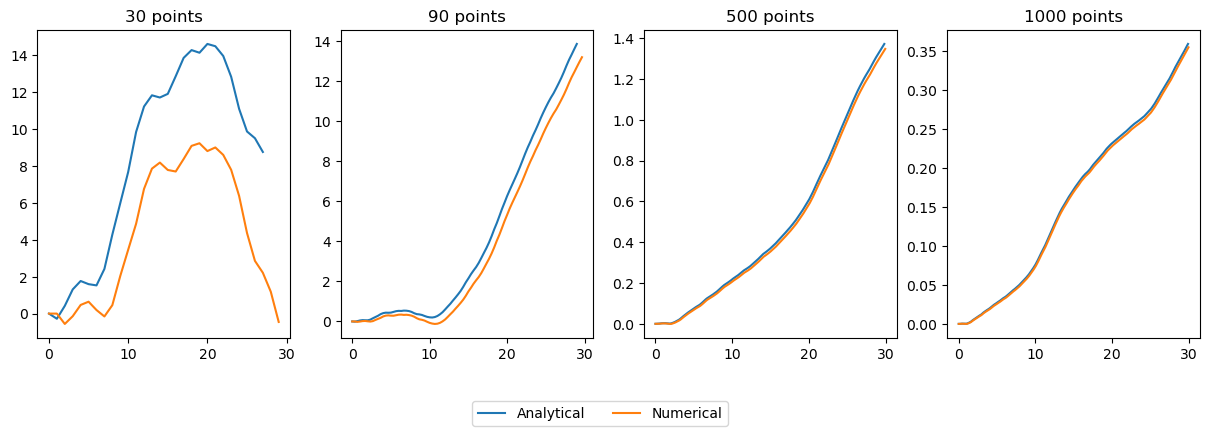

In [5]:
v0 = 0
x0 = 0

fig, ax = plt.subplots(1, 4, figsize = (15,4))

axi = ax[0]
noise = np.array(df_ns30["deets_v"][0:len(df_ns30)-2])
time = np.array(df_ns30["deets_t"][0:len(df_ns30)-2])
analytical = f_analytical(line, noise, time, x0, v0)
axi.plot(time, analytical, label = "Analytical")
axi.plot(df_sol30.deets_t.tolist(), df_sol30.deets_v.tolist(), label = "Numerical")
axi.set_title("30 points")


axi = ax[1]
noise = np.array(df_ns90["deets_v"][0:len(df_ns90)-2])
time = np.array(df_ns90["deets_t"][0:len(df_ns90)-2])
analytical = f_analytical(line, noise, time, x0, v0)
axi.plot(time, analytical, label = "Analytical")
axi.plot(df_sol90.deets_t.tolist(), df_sol90.deets_v.tolist(), label = "Numerical")
axi.set_title("90 points")

axi = ax[2]
noise = np.array(df_ns500["deets_v"][0:len(df_ns500)-2])
time = np.array(df_ns500["deets_t"][0:len(df_ns500)-2])
analytical = f_analytical(line, noise, time, x0, v0)
axi.plot(time, analytical, label = "Analytical")
axi.plot(df_sol500.deets_t.tolist(), df_sol500.deets_v.tolist(), label = "Numerical")
axi.set_title("500 points")

axi = ax[3]
noise = np.array(df_ns1000["deets_v"][0:len(df_ns1000)-2])
time = np.array(df_ns1000["deets_t"][0:len(df_ns1000)-2])
analytical = f_analytical(line, noise, time, x0, v0)
axi.plot(time, analytical, label = "Analytical")
axi.plot(df_sol1000.deets_t.tolist(), df_sol1000.deets_v.tolist(), label = "Numerical")
axi.set_title("1000 points")
handles, labels = axi.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor = (0.59, -0.03), ncol = 2)



# Non-zero initial conditions

In [6]:
h = 0.5
df_sol500 = ut.read_hdf5_data(data_path + f"2o_sde-h-{h}-500-v03.hdf5")

Text(0.5, 1.0, '500 points')

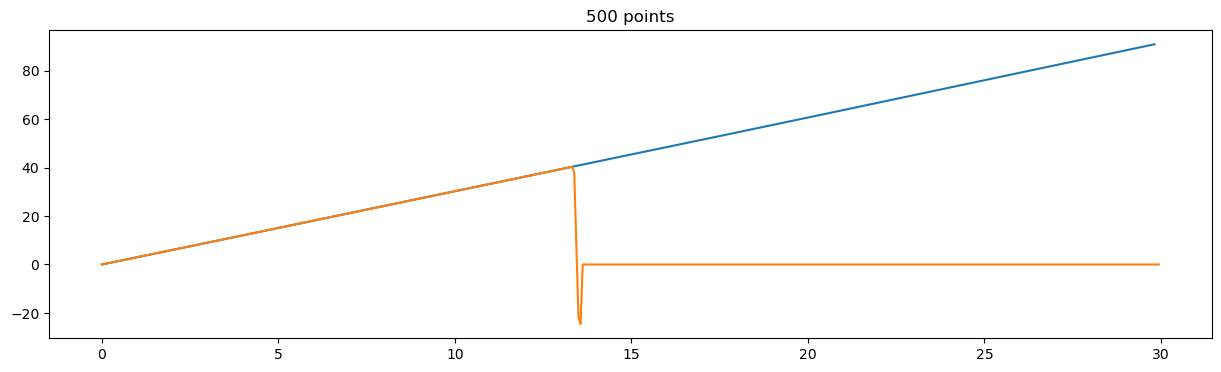

In [7]:
v0 = 3
x0 = 0

fig, axi = plt.subplots(figsize = (15,4))

noise = np.array(df_ns500["deets_v"][0:len(df_ns500)-2])
time = np.array(df_ns500["deets_t"][0:len(df_ns500)-2])
analytical = f_analytical(line, noise, time, x0, v0)
axi.plot(time, analytical, label = "Analytical")
axi.plot(df_sol500.deets_t.tolist(), df_sol500.deets_v.tolist(), label = "Numerical")
axi.set_title("500 points")